## Exploratory Data Analysis

# Placeholder Image

Second step of an analytics project is to perfrom Exploratory Analysis so that we can 
1. Observe trends and relationships between factors/variables to better understand the dataset

In [46]:
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
sb.set_theme()

# Import Cleaned dataset into the notebook

In [3]:
# heart_pki_2020_cleaned_df
heart_pki_df = pd.read_csv('datasets/heart_pki_2020_cleaned.csv')
heart_pki_df.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No


# 1. heart_pki_df EDA

In [5]:
heart_pki_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 18 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   HeartDisease      319795 non-null  object 
 1   BMI               319795 non-null  float64
 2   Smoking           319795 non-null  object 
 3   AlcoholDrinking   319795 non-null  object 
 4   Stroke            319795 non-null  object 
 5   PhysicalHealth    319795 non-null  float64
 6   MentalHealth      319795 non-null  float64
 7   DiffWalking       319795 non-null  object 
 8   Sex               319795 non-null  object 
 9   AgeCategory       319795 non-null  object 
 10  Race              319795 non-null  object 
 11  Diabetic          319795 non-null  object 
 12  PhysicalActivity  319795 non-null  object 
 13  GenHealth         319795 non-null  object 
 14  SleepTime         319795 non-null  float64
 15  Asthma            319795 non-null  object 
 16  KidneyDisease     31

In [15]:
numeric_features=['BMI', 'PhysicalHealth', 'MentalHealth', 'SleepTime']
categorical_features=['HeartDisease', 'Smoking', 'AlcoholDrinking', 'Stroke', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth','Asthma', 'KidneyDisease', 'SkinCancer']

## 1.1 PKI - Continuous Variables

Text(0.5, 1.03, 'Distribution of Continuous Variables')

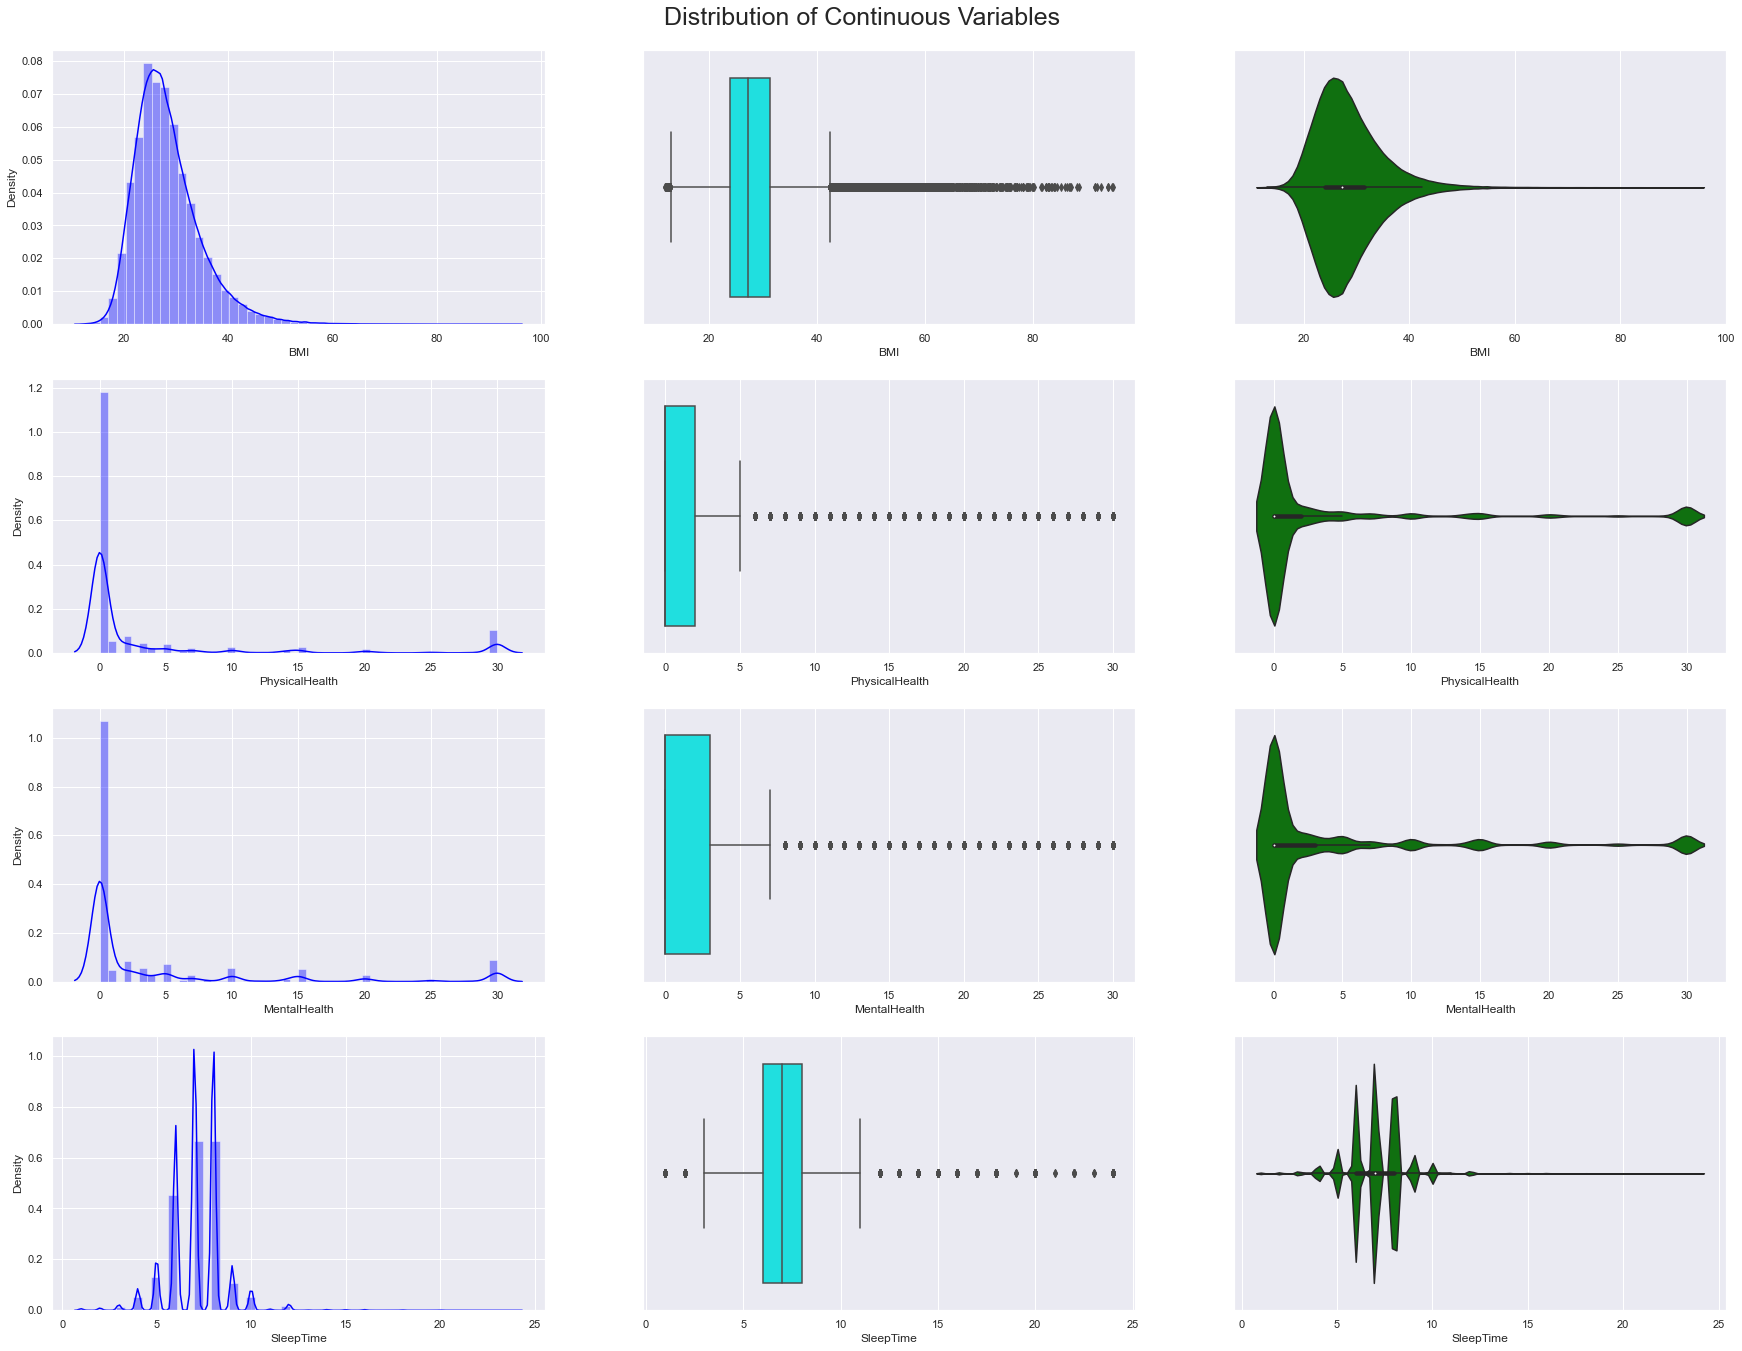

In [40]:
fig,ax = plt.subplots(len(numeric_features),3,figsize=(30,20))
for index,i in enumerate(numeric_features):
    sb.distplot(heart_pki_df[i],ax=ax[index,0],color='blue')
    sb.boxplot(heart_pki_df[i],ax=ax[index,1],color='cyan')
    sb.violinplot(heart_pki_df[i],ax=ax[index,2],color='green')
    
#fig.tight_layout()
fig.subplots_adjust(top=1)
plt.suptitle("Distribution of Continuous Variables", y=1.03,fontsize=25)

- Only the distribution of BMI is similar Normal distribution
- Physical Health, Mental Health, and SleepTime is not

### 1.1.1 PKI - Continuous Variables - `BMI`

In [41]:
heart_pki_df['BMI'].describe()

count    319795.000000
mean         28.325399
std           6.356100
min          12.020000
25%          24.030000
50%          27.340000
75%          31.420000
max          94.850000
Name: BMI, dtype: float64

<AxesSubplot:xlabel='BMI', ylabel='HeartDisease'>

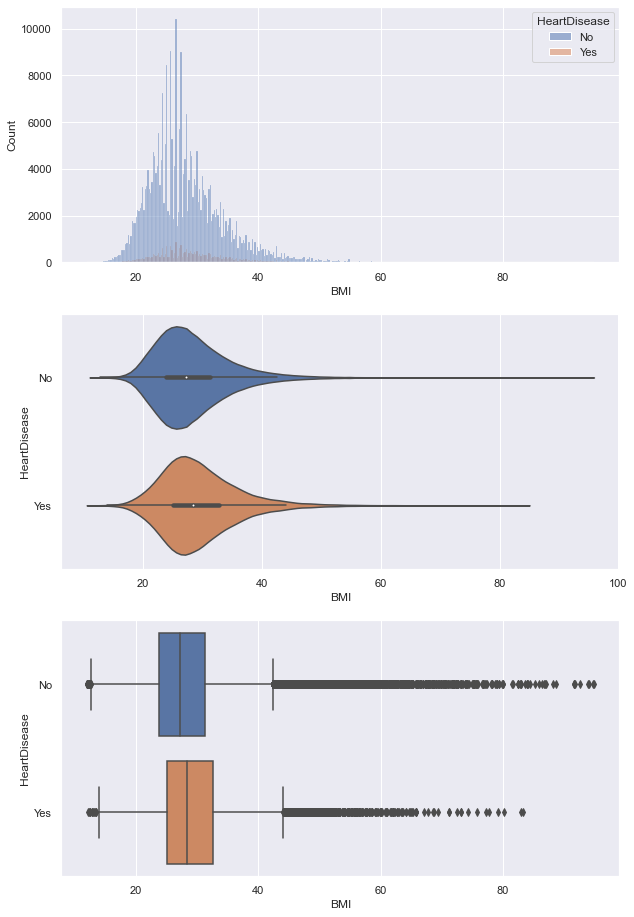

In [52]:
fig,ax = plt.subplots(3,1,figsize=(10,16))
sb.histplot(x='BMI', hue='HeartDisease', data=heart_pki_df, ax=ax[0])
sb.violinplot(x='BMI',y='HeartDisease', split=True, data=heart_pki_df, ax=ax[1])
sb.boxplot(x='BMI',y='HeartDisease', data=heart_pki_df, ax=ax[2])

- The distributions of BMI of people with Heart Disease & without Heart Disease are similar 

### 1.1.2 PKI - Continuous Variables - `Physical Health`
- how many days in a month did you feel poor physical health.

In [58]:
heart_pki_df['PhysicalHealth'].describe()

count    319795.00000
mean          3.37171
std           7.95085
min           0.00000
25%           0.00000
50%           0.00000
75%           2.00000
max          30.00000
Name: PhysicalHealth, dtype: float64

Text(0.5, 1.0, 'People with Heart Disease')

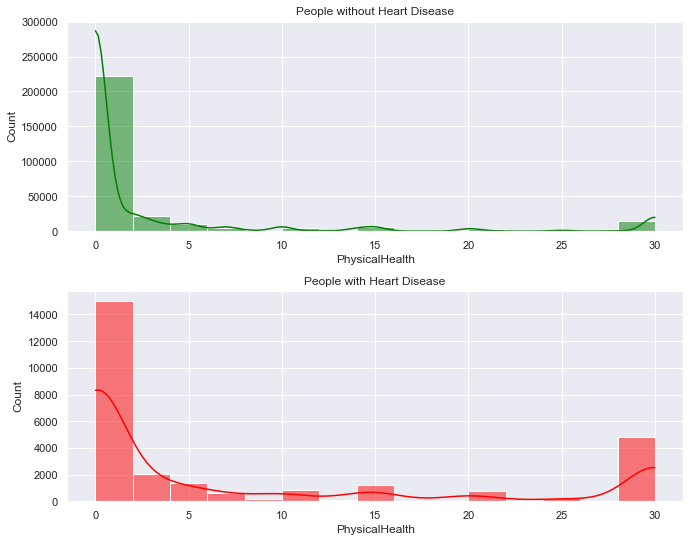

In [85]:
fig,ax = plt.subplots(2,1,figsize=(10,8))
sb.set(style="darkgrid")
fig.tight_layout(pad=3.0)
sb.histplot(data=heart_pki_df[heart_pki_df["HeartDisease"] == "No"], x="PhysicalHealth", ax=ax[0], kde=True, bins=15, color="green").set_title('People without Heart Disease')
sb.histplot(data=heart_pki_df[heart_pki_df["HeartDisease"] == "Yes"], x="PhysicalHealth", ax=ax[1], kde=True, bins=15, color="red").set_title('People with Heart Disease')

- Discovery:::


### 1.1.3 PKI - Continuous Variables - `Mental Health`
- how many days in a month did you feel poor mental health.

In [86]:
heart_pki_df['MentalHealth'].describe()

count    319795.000000
mean          3.898366
std           7.955235
min           0.000000
25%           0.000000
50%           0.000000
75%           3.000000
max          30.000000
Name: MentalHealth, dtype: float64

Text(0.5, 1.0, 'People with Heart Disease')

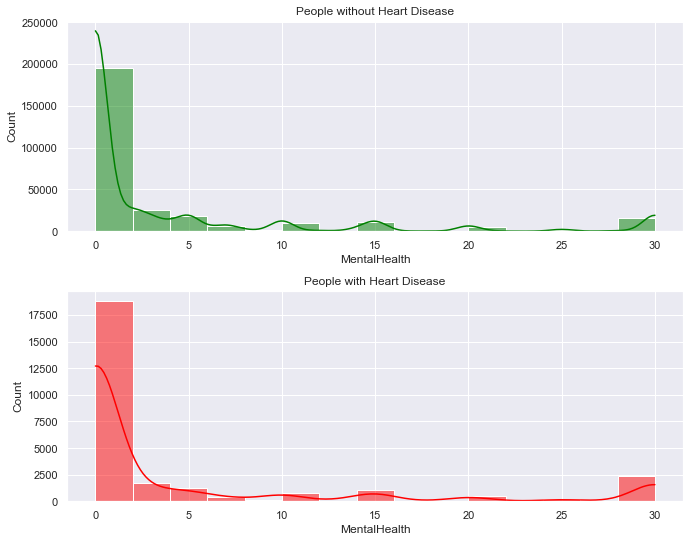

In [87]:
fig,ax = plt.subplots(2,1,figsize=(10,8))
sb.set(style="darkgrid")
fig.tight_layout(pad=3.0)
sb.histplot(data=heart_pki_df[heart_pki_df["HeartDisease"] == "No"], x="MentalHealth", ax=ax[0], kde=True, bins=15, color="green").set_title('People without Heart Disease')
sb.histplot(data=heart_pki_df[heart_pki_df["HeartDisease"] == "Yes"], x="MentalHealth", ax=ax[1], kde=True, bins=15, color="red").set_title('People with Heart Disease')

- Discoveries:::

### 1.1.4 PKI - Continuous Variables - `Sleep Time`
- On average, how many hours of sleep do you get in a 24-hour period?

In [88]:
heart_pki_df['SleepTime'].describe()

count    319795.000000
mean          7.097075
std           1.436007
min           1.000000
25%           6.000000
50%           7.000000
75%           8.000000
max          24.000000
Name: SleepTime, dtype: float64

Text(0.5, 1.0, 'People with Heart Disease')

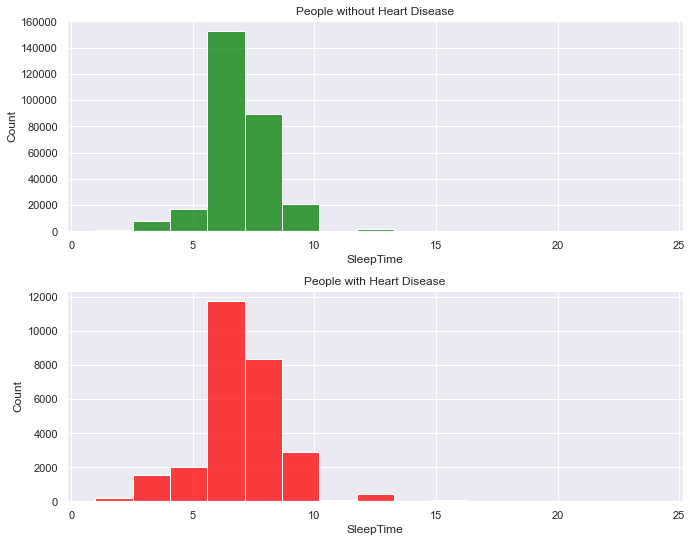

In [90]:
fig,ax = plt.subplots(2,1,figsize=(10,8))
sb.set(style="darkgrid")
fig.tight_layout(pad=3.0)
sb.histplot(data=heart_pki_df[heart_pki_df["HeartDisease"] == "No"], x="SleepTime", ax=ax[0], bins=15, color="green").set_title('People without Heart Disease')
sb.histplot(data=heart_pki_df[heart_pki_df["HeartDisease"] == "Yes"], x="SleepTime", ax=ax[1], bins=15, color="red").set_title('People with Heart Disease')

- Discoveries

## 1.2 PKI - Categorical Variables
- HeartDisease, Smoking, AlcoholDrinking, Stroke, DiffWalking, Sex, AgeCategory, Race, Diabetic, PhysicalActivity, GenHealth, Asthma, KidneyDisease, SkinCancer

In [93]:
no_hd_df = heart_pki_df[heart_pki_df["HeartDisease"] == "No"]
hd_df = heart_pki_df[heart_pki_df["HeartDisease"] == "Yes"]

### 1.2.1 PKI - Categorical Variables `AgeCategory`
- Fourteen-level age category, then calculated the mean

<AxesSubplot:xlabel='AgeCategory', ylabel='count'>

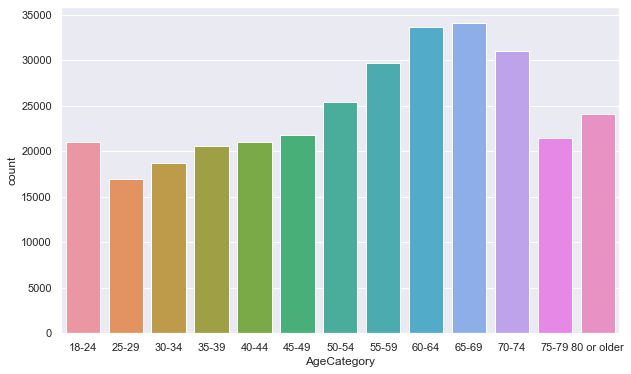

In [142]:
fig,ax = plt.subplots(1,1,figsize=(10,6))
sb.countplot(x='AgeCategory',data=heart_pki_df, order = sorted(list(set(heart_pki_df['AgeCategory']))))

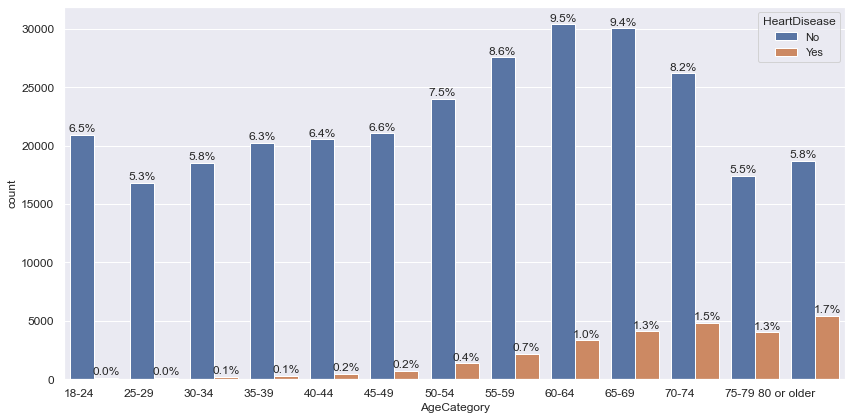

In [12]:
fig,ax = plt.subplots(1,1,figsize=(12,6))
plotCatVar('AgeCategory')

People of higher age have a higher chance of having Heart Disease

### 1.2.2 PKI - Categorical Variables `Sex`
- Are you male or female?

<AxesSubplot:xlabel='Sex', ylabel='count'>

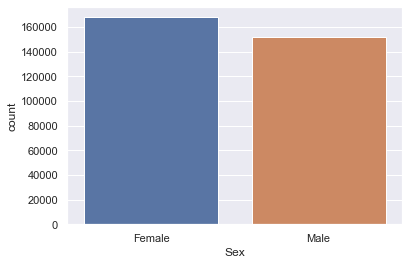

In [7]:
sb.countplot(x='Sex',data = heart_pki_df)

Text(0.5, 1.0, 'Females with Heart Disease')

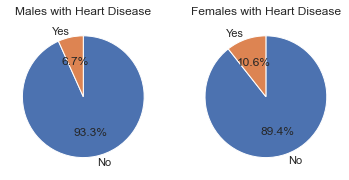

In [128]:
male_df = heart_pki_df[heart_pki_df["Sex"] == "Female"]
female_df = heart_pki_df[heart_pki_df["Sex"] == "Male"]

male_hd = male_df['HeartDisease'].value_counts()
female_hd = female_df['HeartDisease'].value_counts()


fig, axs = plt.subplots(1,2)
fig.add_subplot(axs[0])
plt.pie(male_hd, labels = male_hd.index,startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Males with Heart Disease')


fig.add_subplot(axs[1])
plt.pie(female_hd, labels = male_hd.index, startangle = 90,counterclock = False, autopct = '%1.1f%%')
plt.title('Females with Heart Disease')

Discoveries::

### 1.2.3 PKI - Categorical Variables `GenHealth`
- Would you say that in general your health is...

Text(0, 0.5, 'count (%)')

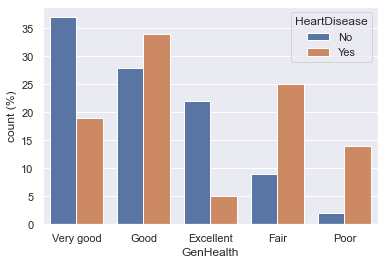

In [141]:
temp1 = pd.value_counts(no_hd_df['GenHealth'])
temp1_v = (temp1.values / sum(temp1.values) * 100).astype(int)
temp1_index = temp1.index
temp2 = pd.value_counts(hd_df['GenHealth'])
temp2_v = (temp2.values / sum(temp2.values) * 100).astype(int)
temp2_index = temp2.index

temp3 = pd.DataFrame(columns = ['GenHealth','HeartDisease'])
start = 0
for i,j in zip(temp1_index,temp1_v):
    for m in range(j):
        temp3.loc[start] = [i,'No']
        start += 1
for i,j in zip(temp2_index,temp2_v):
    for m in range(j):
        temp3.loc[start] = [i,'Yes']
        start += 1

sb.countplot(x='GenHealth',data=temp3,hue = 'HeartDisease')
plt.ylabel('count (%)')